In [10]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Loading the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [12]:
# Normalizing images (pixel values between 0 and 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
# Defining class names for reference
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Build the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Training the model
model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=10,
          validation_data=(test_images.reshape(-1, 28, 28, 1), test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9617 - loss: 0.0989 - val_accuracy: 0.9108 - val_loss: 0.3241
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9682 - loss: 0.0837 - val_accuracy: 0.9029 - val_loss: 0.3721
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9692 - loss: 0.0807 - val_accuracy: 0.9101 - val_loss: 0.3455
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9747 - loss: 0.0673 - val_accuracy: 0.9032 - val_loss: 0.3829
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9748 - loss: 0.0658 - val_accuracy: 0.9074 - val_loss: 0.4386
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9788 - loss: 0.0553 - val_accuracy: 0.9107 - val_loss: 0.4136
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 36ms/step - accuracy: 0.9789 - loss: 0.0538 - val_accuracy: 0.9057 - val_loss: 0.4552
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.9810 -

In [16]:
# Making predictions on two sample images
sample_images = test_images[:2]
sample_labels = test_labels[:2]
predictions = model.predict(sample_images.reshape(-1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


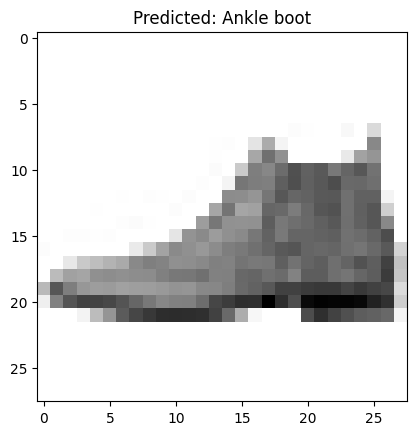

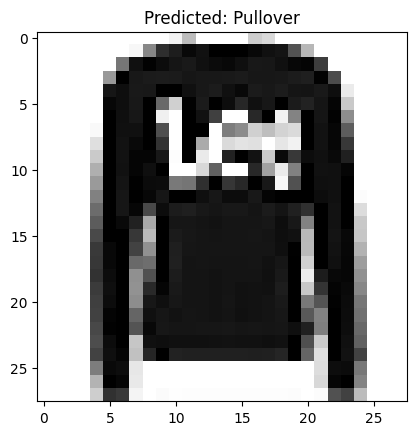

In [17]:
# Displaying the images and predictions
for i in range(2):
    plt.imshow(sample_images[i], cmap=plt.cm.binary)
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}")
    plt.show()